## Carga de Librerias

In [79]:
import pandas as pd     # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np    # linear algebra
import matplotlib.pyplot as plt     # data visualization
import seaborn as sns               # data visualization
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler        # data preprocessing

In [80]:
renfe1 = pd.read_csv("/Users/yeraysouto/Desktop/M3/Entregable1/renfe.csv", sep=',', encoding='latin-1')

## Información general del dataset

¿Me puedes decir todas las variables que tenemos nulos?

In [81]:
renfe1.head()

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75


In [82]:
renfe1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383568 entries, 0 to 383567
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   FECHA_CONSULTA  383568 non-null  object 
 1   FECHA_INICIO    383568 non-null  object 
 2   FECHA_FIN       383568 non-null  object 
 3   CIUDAD_ORIGEN   383568 non-null  object 
 4   CIUDAD_DESTINO  383568 non-null  object 
 5   TIPO_TREN       345211 non-null  object 
 6   TIPO_TARIFA     344009 non-null  object 
 7   CLASE           344000 non-null  object 
 8   PRECIO          355038 non-null  float64
dtypes: float64(1), object(8)
memory usage: 26.3+ MB


In [83]:
renfe1.describe()

,PRECIO
count,355038.000000
mean,61.435380
std,25.695934
min,0.000000
25%,41.200000
50%,58.150000
75%,76.300000
max,342.800000


In [84]:
renfe1.isnull().sum()

FECHA_CONSULTA        0
FECHA_INICIO          0
FECHA_FIN             0
CIUDAD_ORIGEN         0
CIUDAD_DESTINO        0
TIPO_TREN         38357
TIPO_TARIFA       39559
CLASE             39568
PRECIO            28530
dtype: int64

### Reconvertir columnas de fecha a formato fecha y hora

In [85]:
renfe1["FECHA_CONSULTA"] = pd.to_datetime(renfe1['FECHA_CONSULTA'])
renfe1["FECHA_INICIO"] = pd.to_datetime(renfe1['FECHA_INICIO'])
renfe1["FECHA_FIN"] = pd.to_datetime(renfe1['FECHA_FIN'])

In [86]:
renfe1.info()   # Check the data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383568 entries, 0 to 383567
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   FECHA_CONSULTA  383568 non-null  datetime64[ns]
 1   FECHA_INICIO    383568 non-null  datetime64[ns]
 2   FECHA_FIN       383568 non-null  datetime64[ns]
 3   CIUDAD_ORIGEN   383568 non-null  object        
 4   CIUDAD_DESTINO  383568 non-null  object        
 5   TIPO_TREN       345211 non-null  object        
 6   TIPO_TARIFA     344009 non-null  object        
 7   CLASE           344000 non-null  object        
 8   PRECIO          355038 non-null  float64       
dtypes: datetime64[ns](3), float64(1), object(5)
memory usage: 26.3+ MB


## Tratamiento de duplicados 


In [87]:
renfe1[renfe1.duplicated()]# Check the number of duplicated rows

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO
67494,2019-04-29 23:15:13,2019-05-14 06:20:00,2019-05-14 14:25:00,MADRID,BARCELONA,LD-AVE,Promo,Turista,NaN
82429,2019-04-30 09:09:51,2019-05-19 17:30:00,2019-05-19 19:43:00,VALENCIA,MADRID,INTERCITY,Flexible,Turista,55.40
88401,2019-05-15 23:37:01,2019-06-21 21:05:00,2019-06-21 23:32:00,VALENCIA,MADRID,INTERCITY,NaN,NaN,NaN
107458,2019-06-12 11:51:44,2019-06-16 17:30:00,2019-06-16 19:43:00,VALENCIA,MADRID,INTERCITY,Flexible,TuristaSólo plaza H,55.40
143395,2019-08-17 03:22:19,2019-09-01 21:03:00,2019-09-01 23:28:00,VALENCIA,MADRID,INTERCITY,Flexible,Turista,NaN
159167,2019-05-16 13:12:07,2019-06-29 21:05:00,2019-06-29 23:32:00,VALENCIA,MADRID,INTERCITY,NaN,NaN,NaN
170659,2019-05-15 21:26:30,2019-06-23 21:05:00,2019-06-23 23:32:00,VALENCIA,MADRID,INTERCITY,NaN,NaN,NaN
191339,2019-08-18 17:34:03,2019-08-23 21:03:00,2019-08-23 23:28:00,VALENCIA,MADRID,INTERCITY,Flexible,Turista,55.40
235466,2019-06-18 23:16:29,2019-07-23 07:00:00,2019-07-23 14:25:00,MADRID,BARCELONA,LD-AVE,Promo,Turista Plus,NaN
241656,2019-05-14 03:01:42,2019-07-07 21:05:00,2019-07-07 23:32:00,VALENCIA,MADRID,INTERCITY,Promo,Turista,NaN


In [88]:
renfe1.drop_duplicates(inplace=True)   # Drop the duplicated rows

## Tratamiento de nulos

In [229]:
renfe1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 380117 entries, 0 to 383567
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   FECHA_CONSULTA  380117 non-null  datetime64[ns]
 1   FECHA_INICIO    380117 non-null  datetime64[ns]
 2   FECHA_FIN       380117 non-null  datetime64[ns]
 3   TIEMPO_VIAJE    380117 non-null  float64       
 4   DIF_INI_BUS     380117 non-null  float64       
 5   CIUDAD_ORIGEN   380117 non-null  object        
 6   CIUDAD_DESTINO  380117 non-null  object        
 7   TIPO_TREN       380117 non-null  object        
 8   TIPO_TARIFA     380117 non-null  object        
 9   CLASE           380117 non-null  object        
 10  PRECIO          380117 non-null  float64       
dtypes: datetime64[ns](3), float64(3), object(5)
memory usage: 34.8+ MB


### Precios

In [90]:
renfe1.isnull().sum().sum()   # Check the number of missing values

np.int64(145990)

In [91]:
renfe1["PRECIO"].isnull().sum()   # Check the number of missing values in the column "PRECIO"


np.int64(28516)

In [114]:
nulos = renfe1["PRECIO"].isnull().sum().sum()   # Check the percentage of missing values in each column

In [111]:
porcentaje_nulos = (nulos / renfe1["PRECIO"].shape[0] * 100)

In [112]:
porcentaje_nulos

np.float64(7.434870575475043)

### Tratamiento PRECIOS

Vamos a analizar los nulos de cada columna, explícame qué harías con cada columna nula.


In [137]:
renfe1

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,TIEMPO_VIAJE,DIF_INI_BUS,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,158.0,50092.950000,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,190.0,31494.816667,BARCELONA,MADRID,AVE,Flexible,Turista,107.70
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,150.0,52275.950000,SEVILLA,MADRID,AVE,Promo,Turista,47.30
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,460.0,26968.016667,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,179.0,68741.383333,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75
...,...,...,...,...,...,...,...,...,...,...,...
383563,2019-05-06 05:11:53,2019-05-10 19:40:00,2019-05-10 21:29:00,109.0,6628.116667,MADRID,VALENCIA,AVE,Flexible,NaN,73.10
383564,2019-06-19 21:48:56,2019-08-05 20:00:00,2019-08-05 23:10:00,190.0,67571.066667,BARCELONA,MADRID,AVE,Promo,Preferente,54.45
383565,2019-04-24 23:21:44,2019-04-29 16:15:00,2019-04-29 17:55:00,100.0,6773.266667,VALENCIA,MADRID,AVE,Promo,Turista,27.80
383566,2019-05-27 21:05:19,2019-07-07 15:00:00,2019-07-07 17:21:00,141.0,58674.683333,MADRID,SEVILLA,AVE,Promo,NaN,47.30


In [140]:
renfe1.groupby(["TIPO_TARIFA"])["PRECIO"].mean()   # Check the average price of each route

TIPO_TARIFA
4x100                        0.000000
Adulto ida                  31.343371
COD.PROMOCIONAL             57.416667
Doble Familiar-Flexible     98.200000
Flexible                    80.188719
Grupos Ida                  86.150000
Individual-Flexible        150.600000
Mesa                       257.142857
Promo                       59.649460
Promo +                     36.283101
Name: PRECIO, dtype: float64

Primero realizamos listas con: el tipo de "CLASE" y la Media del precio segun la clase.

In [164]:
clases_unicas = renfe1["CLASE"].unique()   # Check the unique values of the column "CLASE"
mean_precios = renfe1.groupby(["CLASE"])["PRECIO"].mean()
# Check the average price of each type of fare

In [166]:
mean_precios_dict = dict(zip(clases_unicas, mean_precios))


In [162]:
indexes = renfe1.loc[renfe1["PRECIO"].isnull()].index 
# Check the rows with missing values in the "PRECIO" column

In [167]:
renfe1["PRECIO"] = renfe1["PRECIO"].fillna(renfe1["CLASE"].map(mean_precios_dict))

<Axes: >

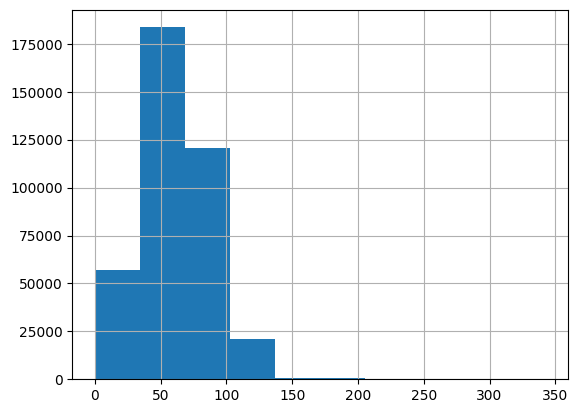

In [170]:
renfe1["PRECIO"].hist()   # Check the number of missing values in the "PRECIO" column   

### Tratamiento TIPO_TRENES

In [179]:
renfe1  # Check the unique values of the column "CLASE"

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,TIEMPO_VIAJE,DIF_INI_BUS,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,158.0,50092.950000,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,190.0,31494.816667,BARCELONA,MADRID,AVE,Flexible,Turista,107.70
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,150.0,52275.950000,SEVILLA,MADRID,AVE,Promo,Turista,47.30
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,460.0,26968.016667,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,179.0,68741.383333,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75
...,...,...,...,...,...,...,...,...,...,...,...
383563,2019-05-06 05:11:53,2019-05-10 19:40:00,2019-05-10 21:29:00,109.0,6628.116667,MADRID,VALENCIA,AVE,Flexible,NaN,73.10
383564,2019-06-19 21:48:56,2019-08-05 20:00:00,2019-08-05 23:10:00,190.0,67571.066667,BARCELONA,MADRID,AVE,Promo,Preferente,54.45
383565,2019-04-24 23:21:44,2019-04-29 16:15:00,2019-04-29 17:55:00,100.0,6773.266667,VALENCIA,MADRID,AVE,Promo,Turista,27.80
383566,2019-05-27 21:05:19,2019-07-07 15:00:00,2019-07-07 17:21:00,141.0,58674.683333,MADRID,SEVILLA,AVE,Promo,NaN,47.30


In [180]:
renfe1["TIPO_TREN"] = renfe1.groupby(["CIUDAD_ORIGEN", "CIUDAD_DESTINO", "FECHA_INICIO", "FECHA_FIN"])["TIPO_TREN"].transform(lambda x: x.ffill().bfill())  # Fill the missing values in the "TIPO_TREN" column with the mode

/var/folders/6z/w5b7jg7n47g1sp0cg04fbvlw0000gn/T/ipykernel_24331/3231026837.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  renfe1["TIPO_TREN"] = renfe1.groupby(["CIUDAD_ORIGEN", "CIUDAD_DESTINO", "FECHA_INICIO", "FECHA_FIN"])["TIPO_TREN"].transform(lambda x: x.ffill().bfill())  # Fill the missing values in the "TIPO_TREN" column with the mode


In [181]:
renfe1["TIPO_TREN"].isnull().sum()   # Check the number of missing values in the "TIPO_TREN" column

np.int64(159)

In [182]:
renfe1.dropna(subset=["TIPO_TREN"], inplace=True)   # Drop the rows with missing values in the "TIPO_TREN" column

### Tratamiento TIPO_TARIFA

In [191]:
renfe1["TIPO_TREN"].isnull().sum()   # Check the number of missing values in the "TIPO_TREN" column

np.int64(0)

In [201]:
renfe_prueba_tarifa1 = renfe1.copy()

In [226]:
renfe1["TIPO_TARIFA"] = renfe1.groupby(["CIUDAD_ORIGEN", "CIUDAD_DESTINO", "FECHA_INICIO", "FECHA_FIN", "PRECIO"])["TIPO_TARIFA"].transform(lambda x: x.ffill().bfill())  # Fill the missing values in the "TIPO_TARIFA" column with the mode

/var/folders/6z/w5b7jg7n47g1sp0cg04fbvlw0000gn/T/ipykernel_24331/3819651680.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  renfe1["TIPO_TARIFA"] = renfe1.groupby(["CIUDAD_ORIGEN", "CIUDAD_DESTINO", "FECHA_INICIO", "FECHA_FIN", "PRECIO"])["TIPO_TARIFA"].transform(lambda x: x.ffill().bfill())  # Fill the missing values in the "TIPO_TARIFA" column with the mode


In [227]:
renfe1["TIPO_TARIFA"].isnull().sum()   # Check the number of missing values in the "TIPO_TARIFA" column

np.int64(3267)

In [228]:
renfe1.dropna(subset=["TIPO_TARIFA"], inplace=True)   # Drop the rows with missing values in the "TIPO_TARIFA" column

### Tratamiento CLASE

In [210]:
renfe1["CLASE"] = renfe1.groupby(["CIUDAD_ORIGEN", "CIUDAD_DESTINO", "FECHA_INICIO", "FECHA_FIN", "PRECIO"])["CLASE"].transform(lambda x: x.ffill().bfill())  # Fill the missing values in the "CLASE" column with the mode


/var/folders/6z/w5b7jg7n47g1sp0cg04fbvlw0000gn/T/ipykernel_24331/3932760847.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  renfe1["CLASE"] = renfe1.groupby(["CIUDAD_ORIGEN", "CIUDAD_DESTINO", "FECHA_INICIO", "FECHA_FIN", "PRECIO"])["CLASE"].transform(lambda x: x.ffill().bfill())  # Fill the missing values in the "CLASE" column with the mode


In [224]:
renfe1["CLASE"].isnull().sum()   # Check the number of missing values in the "CLASE" column


np.int64(0)

In [212]:
renfe1["CLASE"] = renfe1.groupby(["PRECIO"])["CLASE"].transform(lambda x: x.ffill().bfill())  # Fill the missing values in the "CLASE" column with the mode

/var/folders/6z/w5b7jg7n47g1sp0cg04fbvlw0000gn/T/ipykernel_24331/2544639864.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  renfe1["CLASE"] = renfe1.groupby(["PRECIO"])["CLASE"].transform(lambda x: x.ffill().bfill())  # Fill the missing values in the "CLASE" column with the mode


In [213]:
renfe1["CLASE"].isnull().sum()   # Check the number of missing values in the "CLASE" column 

np.int64(1)

In [214]:
renfe1.dropna(subset=["CLASE"], inplace=True)   # Drop the rows with missing values in the "CLASE" column

In [215]:
renfe1["CLASE"].isnull().sum()   # Check the number of missing values in the "CLASE" column

np.int64(0)

In [218]:
renfe1.isnull().sum().sum()   # Check the number of missing values in the dataset

np.int64(39535)

In [223]:
renfe1["TIPO_TARIFA"].isnull().sum()   # Check the number of missing values in the "CLASE" column

np.int64(39535)

## Creacion de variables

### Tiempo_Viaje
Variable que me indica en minutos la duración del viaje.

In [92]:
renfe1.head()

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75


In [93]:
renfe1["TIEMPO_VIAJE"] = (renfe1["FECHA_FIN"] - renfe1["FECHA_INICIO"]).dt.total_seconds() / 60


In [94]:
columna = "TIEMPO_VIAJE" # Columna a mover
columnas = [col for col in renfe1.columns if col != columna] # Lista de columnas
columnas.insert(3, columna)  # Insertar en la posición deseada
renfe1 = renfe1[columnas]   # Reordenar las columnas

### Dif_Ini_Bus
Variable que me indica en minutos la diferencia entre la fecha de inicio de viaje y la fecha de búsqueda

In [95]:
dif_ini_bus = (renfe1["FECHA_INICIO"] - renfe1["FECHA_CONSULTA"]).dt.total_seconds() / 60

In [96]:
renfe1["DIF_INI_BUS"] = dif_ini_bus

In [97]:
columna = "DIF_INI_BUS" # Columna a mover
columnas = [col for col in renfe1.columns if col != columna] # Lista de columnas
columnas.insert(4, columna)  # Insertar en la posición deseada
renfe1 = renfe1[columnas]   # Reordenar las columnas

### Que hace esta formula?
Dividir columnas de formato DATE en diferentes unidades de tiempo (Y/M/D..)

In [98]:
renfe_horas_separadas = renfe1.copy()   # Copiar el dataframe

for col in ['FECHA_CONSULTA', 'FECHA_INICIO', 'FECHA_FIN']:
    renfe_horas_separadas[col + '_HORA'] = renfe_horas_separadas[col].dt.hour
    renfe_horas_separadas[col + '_NOMBREDIA'] = renfe_horas_separadas[col].dt.day_name()
    ##O .dt.weekday_name
    renfe_horas_separadas[col + '_DIA'] = renfe_horas_separadas[col].dt.day
    renfe_horas_separadas[col + '_MES'] = renfe_horas_separadas[col].dt.month
    
    del renfe_horas_separadas[col]

renfe_horas_separadas.head()

,TIEMPO_VIAJE,DIF_INI_BUS,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,FECHA_CONSULTA_HORA,FECHA_CONSULTA_NOMBREDIA,FECHA_CONSULTA_DIA,FECHA_CONSULTA_MES,FECHA_INICIO_HORA,FECHA_INICIO_NOMBREDIA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_NOMBREDIA,FECHA_FIN_DIA,FECHA_FIN_MES
0,158.0,50092.950000,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,1,Saturday,25,5,20,Friday,28,6,23,Friday,28,6
1,190.0,31494.816667,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,13,Saturday,22,6,10,Sunday,14,7,13,Sunday,14,7
2,150.0,52275.950000,SEVILLA,MADRID,AVE,Promo,Turista,47.30,6,Wednesday,17,4,13,Thursday,23,5,16,Thursday,23,5
3,460.0,26968.016667,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,21,Friday,10,5,14,Wednesday,29,5,22,Wednesday,29,5
4,179.0,68741.383333,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,19,Thursday,9,5,13,Wednesday,26,6,16,Wednesday,26,6


## FIN

¿Ves alguna variable que hay que limpiarla?

¿Qué haya outlier? Los billetes a 0€, los hemos eliminado.

¿Qué haya datos que no tienen sentido a nivel de negocio? Los billetes a 0€


realizar un mini resumen variable a variable si ves algo raro con ellas, si no ves nada raro no hace falta ponerlo en este resumen, cuando hayas terminado el proceso de limpieza crea una copia del dataset con el nombre de "df_renfe_clean"

<Axes: >

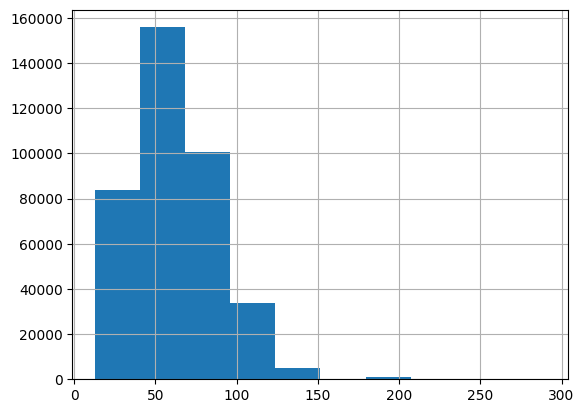

In [241]:
renfe1["PRECIO"].hist()   # Check the distribution of the "PRECIO" column

In [239]:
indexes1 = renfe1[renfe1["PRECIO"] == 0].index

In [240]:
renfe1.drop(indexes1, inplace=True)   # Drop the rows with a price of 0

In [242]:
renfe_clean = renfe1.copy()

In [ ]:
renfe_clean = pikle.load(open("renfe_clean.pkl", "rb"))   # Load the cleaned dataset